
### Default of Credit Card Clients Data
#### Joe Laslie
#### Jan. 2021
---

### 1. Objective of Analysis

>We analyze the "Default of Credit Card Clients Data Set" to compare the predictive accuracy and performance of various classifiers in estimating a default payment of credit card clients for a financial institution in Taiwan.

>We are also interested in being able to interpret those features which may drive default payments more strongly than others.

### 2. Description of Data

> The data comes from the UCI Machine Learning Repository [(link to data)](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

> The data consists of an ID column, 23 features, and a binary response variable (1=Default, 0=No Default)

> Features are explained as follows:
- **LIMIT_BAL:** Amount of the given credit (NT dollar)
- **SEX:** (1 = male; 2 = female)
- **EDUCATION:** (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- **MARRIAGE:** (1 = married, 2 = single, 3 = others)
- **AGE:** (year)
- **PAY_0 - PAY_6:** History of past payment from April to September 2005 (-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months;...; 8 = payment delay for eight months; 9 = payment delay for nine months and above). **(No PAY_1 column)**
- **BILL_AMT1 - BILL_AMT6:** Amount of bill statement from April to September 2005
- **PAY_AMT1 - PAY_AMT6:** Amount of previous payment from April to September 2005

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.chdir('C:\\Users\\lasli\\Documents\\Independent Work\\Credit Default')

file = 'default of credit card clients.xls'
raw_data = pd.read_excel(file, header=1)
raw_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# check data types
raw_data.dtypes.value_counts()

int64    25
dtype: int64

In [4]:
# check missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
raw_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


> Data appears to have values which are not defined for some variables: (EDUCATION, PAY_0 to PAY_6):
- For "EDUCATION," 5, 6, and 0 are undefined
- For "PAY_0"-"PAY_6," -2 and 0 are undefined

In [6]:
for i in ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    print(raw_data[i].value_counts())

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8     

### 3. Data Cleaning, Feature Engineering, Data Exploration

> For the undefined values for variables "EDUCATION" and "PAY_0 - PAY_6" we will remove those observations from the data for now. We may consider later substituting the mean or median of each column for these undefined values. We may also consider using a regression to try to predict what the undefined values should be.

> Variables that need to be ordinally encoded already appear to have been encoded

> We will rename columns to labels which are more convenient


In [7]:
# drop ID column
clean_data = raw_data.drop(labels='ID', axis=1)

# filter the dataframe to drop undefined values
clean_data = clean_data[(clean_data.EDUCATION != 0) & (clean_data.EDUCATION != 5) & 
                        (clean_data.EDUCATION != 6) & 
                        (clean_data.PAY_0 != -2) & (clean_data.PAY_0 != 0) & 
                        (clean_data.PAY_2 != -2) & (clean_data.PAY_2 != 0) & 
                        (clean_data.PAY_3 != -2) & (clean_data.PAY_3 != 0) &
                        (clean_data.PAY_4 != -2) & (clean_data.PAY_4 != 0) &
                        (clean_data.PAY_5 != -2) & (clean_data.PAY_5 != 0) &
                        (clean_data.PAY_6 != -2) & (clean_data.PAY_6 != 0)]

clean_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
11,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
28,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
30,230000,2,1,2,27,-1,-1,-1,-1,-1,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
48,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,360000,1,2,1,45,-1,-1,-1,-1,-1,...,836,986,986,836,836,836,986,986,611,0
29942,130000,1,3,1,45,-1,-1,-1,-1,-1,...,2756,1585,1215,1826,2831,2756,1585,1215,2402,1
29976,40000,1,2,2,47,2,2,3,2,2,...,51259,47151,46934,4000,0,2000,0,3520,0,1
29991,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1


In [8]:
for i in ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    print(clean_data[i].value_counts())

2    1713
1    1684
3     633
4      10
Name: EDUCATION, dtype: int64
-1    2373
 2     794
 1     637
 3     162
 4      34
 8      19
 7       9
 5       9
 6       3
Name: PAY_0, dtype: int64
-1    2447
 2    1347
 3     140
 4      59
 7      20
 6      12
 5      10
 1       4
 8       1
Name: PAY_2, dtype: int64
-1    2433
 2    1358
 3     125
 4      50
 7      27
 6      23
 5      20
 8       3
 1       1
Name: PAY_3, dtype: int64
-1    2521
 2    1251
 3     107
 4      62
 7      58
 5      34
 6       4
 8       2
 1       1
Name: PAY_4, dtype: int64
-1    2571
 2    1186
 3     132
 4      75
 7      57
 5      14
 6       4
 8       1
Name: PAY_5, dtype: int64
-1    2533
 2    1266
 3     126
 7      46
 4      41
 6      15
 5      11
 8       2
Name: PAY_6, dtype: int64


In [9]:
clean_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Rename columns
clean_data = clean_data.rename(columns={'LIMIT_BAL': 'Amt of Given Credit',
                                        'SEX': 'Sex',
                                        'EDUCATION': 'Education',
                                        'MARRIAGE': 'Marriage',
                                        'AGE': 'Age',
                                        'PAY_0': 'Payment Status (Apr)',
                                        'PAY_2': 'Payment Status (May)',
                                        'PAY_3': 'Payment Status (Jun)',
                                        'PAY_4': 'Payment Status (Jul)',
                                        'PAY_5': 'Payment Status (Aug)',
                                        'PAY_6': 'Payment Status (Sep)',
                                        'BILL_AMT1': 'Amt of Bill (Sep)',
                                        'BILL_AMT2': 'Amt of Bill (Aug)',
                                        'BILL_AMT3': 'Amt of Bill (Jul)',
                                        'BILL_AMT4': 'Amt of Bill (Jun)',
                                        'BILL_AMT5': 'Amt of Bill (May)',
                                        'BILL_AMT6': 'Amt of Bill (Apr)',
                                        'PAY_AMT1': 'Amt Paid (Sep)',
                                        'PAY_AMT2': 'Amt Paid (Aug)',
                                        'PAY_AMT3': 'Amt Paid (Jul)',
                                        'PAY_AMT4': 'Amt Paid (Jun)',
                                        'PAY_AMT5': 'Amt Paid (May)',
                                        'PAY_AMT6': 'Amt Paid (Apr)'})

In [11]:
clean_data.describe()

,Amt of Given Credit,Sex,Education,Marriage,Age,Payment Status (Apr),Payment Status (May),Payment Status (Jun),Payment Status (Jul),Payment Status (Aug),...,Amt of Bill (Jun),Amt of Bill (May),Amt of Bill (Apr),Amt Paid (Sep),Amt Paid (Aug),Amt Paid (Jul),Amt Paid (Jun),Amt Paid (May),Amt Paid (Apr),default payment next month
count,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,...,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000
mean,171512.376238,1.592327,1.744802,1.489604,36.527970,0.186139,0.291337,0.324257,0.288861,0.247030,...,22597.757921,22575.670545,22684.466832,4658.640842,4603.816584,4710.744554,4544.991832,4599.959158,4582.581931,0.355693
std,125866.011614,0.491463,0.720013,0.521288,9.177068,1.576475,1.681946,1.738630,1.801481,1.780716,...,44901.751809,44477.783361,45484.390693,10882.854026,11966.265838,13395.341855,11085.058140,13522.212369,14935.501529,0.478782
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-3903.000000,-3876.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,1.000000,1.000000,1.000000,29.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,832.750000,846.000000,780.000000,316.000000,316.000000,316.000000,329.750000,98.750000,0.000000,0.000000
50%,150000.000000,2.000000,2.000000,1.000000,35.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,4169.000000,4087.000000,4166.000000,1600.000000,1595.000000,1443.000000,1444.000000,1238.500000,1046.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,43.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,22871.500000,23352.250000,24056.000000,4413.250000,4391.750000,4196.250000,4100.000000,4000.000000,3710.000000,1.000000
max,740000.000000,2.000000,4.000000,3.000000,72.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,486776.000000,503914.000000,527711.000000,187206.000000,302961.000000,417588.000000,193712.000000,303512.000000,345293.000000,1.000000


> We observe that the response is somewhat imbalanced below. We may consider random oversampling after performing the train-test split.

In [12]:
# check counts and proportion of outcome variable
print(clean_data['default payment next month'].value_counts())
print(clean_data['default payment next month'].value_counts(normalize=True))

0    2603
1    1437
Name: default payment next month, dtype: int64
0    0.644307
1    0.355693
Name: default payment next month, dtype: float64


> Examine the distributions of each feature. Continuous variables appear to be skewed.

Text(0.5, 1.0, 'Amt of Given Balance')

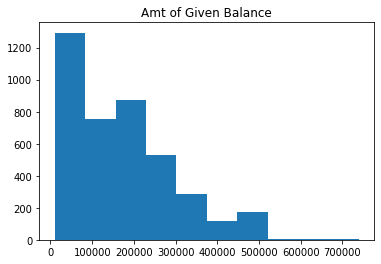

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Amount of the given balance
fig, ax = plt.subplots()
ax.hist(clean_data['Amt of Given Credit'])
ax.set_title('Amt of Given Balance')

Text(0.5, 1.0, 'Age')

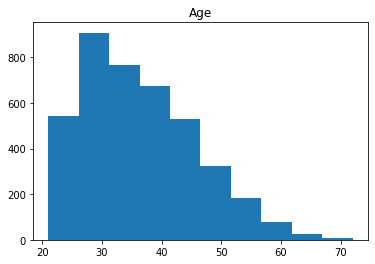

In [14]:
# Age
fig, ax = plt.subplots()
ax.hist(clean_data['Age'])
ax.set_title('Age')

Text(0.5, 1.0, 'Amt of Bill (Apr)')

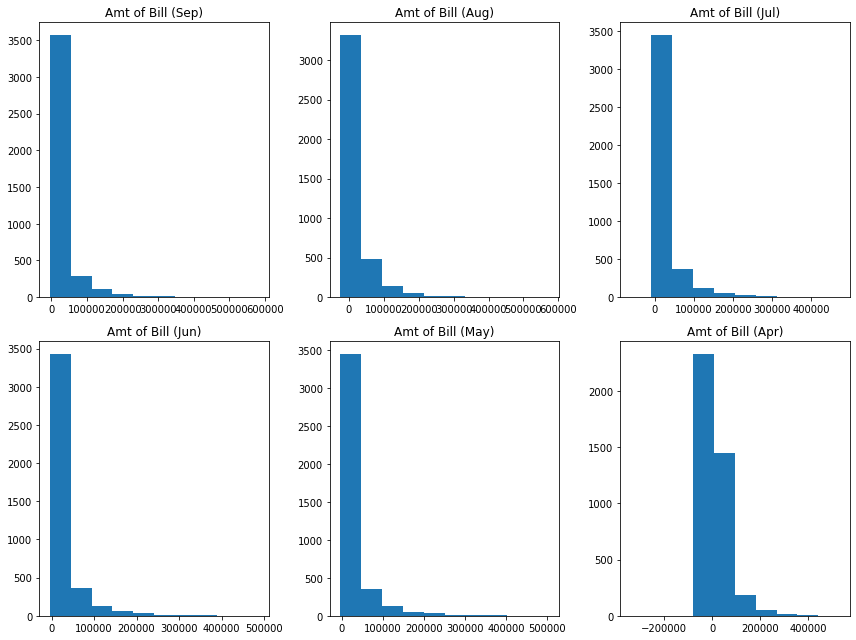

In [15]:
# Bill amounts
fig, ax = plt.subplots(2, 3, tight_layout=True, figsize=(12,9))
ax[0,0].hist(clean_data['Amt of Bill (Sep)'])
ax[0,0].set_title('Amt of Bill (Sep)')
ax[0,1].hist(clean_data['Amt of Bill (Aug)'])
ax[0,1].set_title('Amt of Bill (Aug)')
ax[0,2].hist(clean_data['Amt of Bill (Jul)'])
ax[0,2].set_title('Amt of Bill (Jul)')
ax[1,0].hist(clean_data['Amt of Bill (Jun)'])
ax[1,0].set_title('Amt of Bill (Jun)')
ax[1,1].hist(clean_data['Amt of Bill (May)'])
ax[1,1].set_title('Amt of Bill (May)')
ax[1,2].hist(clean_data['Amt of Bill (Apr)'])
ax[1,2].set_title('Amt of Bill (Apr)')


Text(0.5, 1.0, 'Amt Paid (Apr)')

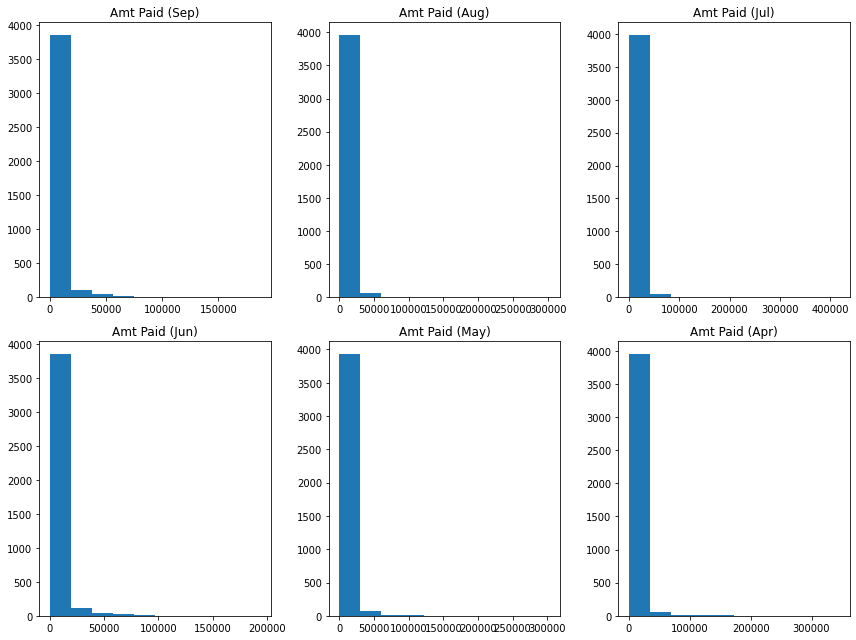

In [16]:
# Amounts paid
fig, ax = plt.subplots(2,3, figsize=(12,9), tight_layout=True)
ax[0,0].hist(clean_data['Amt Paid (Sep)'])
ax[0,0].set_title('Amt Paid (Sep)')
ax[0,1].hist(clean_data['Amt Paid (Aug)'])
ax[0,1].set_title('Amt Paid (Aug)')
ax[0,2].hist(clean_data['Amt Paid (Jul)'])
ax[0,2].set_title('Amt Paid (Jul)')
ax[1,0].hist(clean_data['Amt Paid (Jun)'])
ax[1,0].set_title('Amt Paid (Jun)')
ax[1,1].hist(clean_data['Amt Paid (May)'])
ax[1,1].set_title('Amt Paid (May)')
ax[1,2].hist(clean_data['Amt Paid (Apr)'])
ax[1,2].set_title('Amt Paid (Apr)')

> Features are measured on different scales and do not seem to follow a normal distribution so we will normalize data using min-max scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

y = clean_data['default payment next month']
X = clean_data.iloc[:,:-1]
X

,Amt of Given Credit,Sex,Education,Marriage,Age,Payment Status (Apr),Payment Status (May),Payment Status (Jun),Payment Status (Jul),Payment Status (Aug),...,Amt of Bill (Jul),Amt of Bill (Jun),Amt of Bill (May),Amt of Bill (Apr),Amt Paid (Sep),Amt Paid (Aug),Amt Paid (Jul),Amt Paid (Jun),Amt Paid (May),Amt Paid (Apr)
11,260000,2,1,2,51,-1,-1,-1,-1,-1,...,9966,8517,22287,13668,21818,9966,8583,22301,0,3640
21,120000,2,2,1,39,-1,-1,-1,-1,-1,...,316,0,632,316,316,316,0,632,316,0
28,50000,2,3,1,47,-1,-1,-1,-1,-1,...,3416,2040,30430,257,3415,3421,2044,30430,257,0
30,230000,2,1,2,27,-1,-1,-1,-1,-1,...,13266,15339,14307,36923,17270,13281,15339,14307,37292,0
48,380000,1,2,2,32,-1,-1,-1,-1,-1,...,15134,32018,11849,11873,21540,15138,24677,11851,11875,8251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29934,360000,1,2,1,45,-1,-1,-1,-1,-1,...,836,836,986,986,836,836,836,986,986,611
29942,130000,1,3,1,45,-1,-1,-1,-1,-1,...,2831,2756,1585,1215,1826,2831,2756,1585,1215,2402
29976,40000,1,2,2,47,2,2,3,2,2,...,53415,51259,47151,46934,4000,0,2000,0,3520,0
29991,210000,1,2,1,34,3,2,2,2,2,...,2500,2500,2500,2500,0,0,0,0,0,0


In [18]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = ['%s_scaled' % col for col in clean_data.columns[:-1]])
round(X.describe(), 2)

,Amt of Given Credit_scaled,Sex_scaled,Education_scaled,Marriage_scaled,Age_scaled,Payment Status (Apr)_scaled,Payment Status (May)_scaled,Payment Status (Jun)_scaled,Payment Status (Jul)_scaled,Payment Status (Aug)_scaled,...,Amt of Bill (Jul)_scaled,Amt of Bill (Jun)_scaled,Amt of Bill (May)_scaled,Amt of Bill (Apr)_scaled,Amt Paid (Sep)_scaled,Amt Paid (Aug)_scaled,Amt Paid (Jul)_scaled,Amt Paid (Jun)_scaled,Amt Paid (May)_scaled,Amt Paid (Apr)_scaled
count,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,...,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00,4040.00
mean,0.22,0.59,0.25,0.50,0.30,0.13,0.14,0.15,0.14,0.14,...,0.16,0.05,0.05,0.42,0.02,0.02,0.01,0.02,0.02,0.01
std,0.17,0.49,0.24,0.17,0.18,0.18,0.19,0.19,0.20,0.20,...,0.08,0.09,0.09,0.05,0.06,0.04,0.03,0.06,0.04,0.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.07,0.00,0.00,0.33,0.16,0.00,0.00,0.00,0.00,0.00,...,0.12,0.01,0.01,0.39,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.19,1.00,0.33,0.33,0.27,0.00,0.00,0.00,0.00,0.00,...,0.12,0.02,0.02,0.40,0.01,0.01,0.00,0.01,0.00,0.00
75%,0.32,1.00,0.33,0.67,0.43,0.33,0.33,0.33,0.33,0.33,...,0.16,0.05,0.05,0.42,0.02,0.01,0.01,0.02,0.01,0.01
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [19]:
# Combine features and response back into single dataframe
norm_data = pd.DataFrame(X)
norm_data['Default Payment Next Month'] = y.values
norm_data

,Amt of Given Credit_scaled,Sex_scaled,Education_scaled,Marriage_scaled,Age_scaled,Payment Status (Apr)_scaled,Payment Status (May)_scaled,Payment Status (Jun)_scaled,Payment Status (Jul)_scaled,Payment Status (Aug)_scaled,...,Amt of Bill (Jun)_scaled,Amt of Bill (May)_scaled,Amt of Bill (Apr)_scaled,Amt Paid (Sep)_scaled,Amt Paid (Aug)_scaled,Amt Paid (Jul)_scaled,Amt Paid (Jun)_scaled,Amt Paid (May)_scaled,Amt Paid (Apr)_scaled,Default Payment Next Month
0,0.342466,1.0,0.000000,0.666667,0.588235,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025312,0.051523,0.407316,0.116545,0.032895,0.020554,0.115125,0.000000,0.010542,0
1,0.150685,1.0,0.333333,0.333333,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007954,0.008878,0.391921,0.001688,0.001043,0.000000,0.003263,0.001041,0.000000,1
2,0.054795,1.0,0.666667,0.333333,0.509804,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012112,0.067559,0.391853,0.018242,0.011292,0.004895,0.157089,0.000847,0.000000,0
3,0.301370,1.0,0.000000,0.666667,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039215,0.035808,0.434129,0.092251,0.043837,0.036732,0.073857,0.122868,0.000000,0
4,0.506849,0.0,0.333333,0.666667,0.215686,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.073207,0.030968,0.405247,0.115060,0.049967,0.059094,0.061178,0.039125,0.023896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.479452,0.0,0.333333,0.333333,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009658,0.009575,0.392694,0.004466,0.002759,0.002002,0.005090,0.003249,0.001770,0
4036,0.164384,0.0,0.666667,0.333333,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013571,0.010754,0.392958,0.009754,0.009344,0.006600,0.008182,0.004003,0.006956,1
4037,0.041096,0.0,0.333333,0.666667,0.509804,0.333333,0.333333,0.444444,0.333333,0.333333,...,0.112420,0.100488,0.445671,0.021367,0.000000,0.004789,0.000000,0.011598,0.000000,1
4038,0.273973,0.0,0.333333,0.333333,0.254902,0.444444,0.333333,0.333333,0.333333,0.333333,...,0.013049,0.012556,0.394440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


> We examine density and pairplots of continuous variables

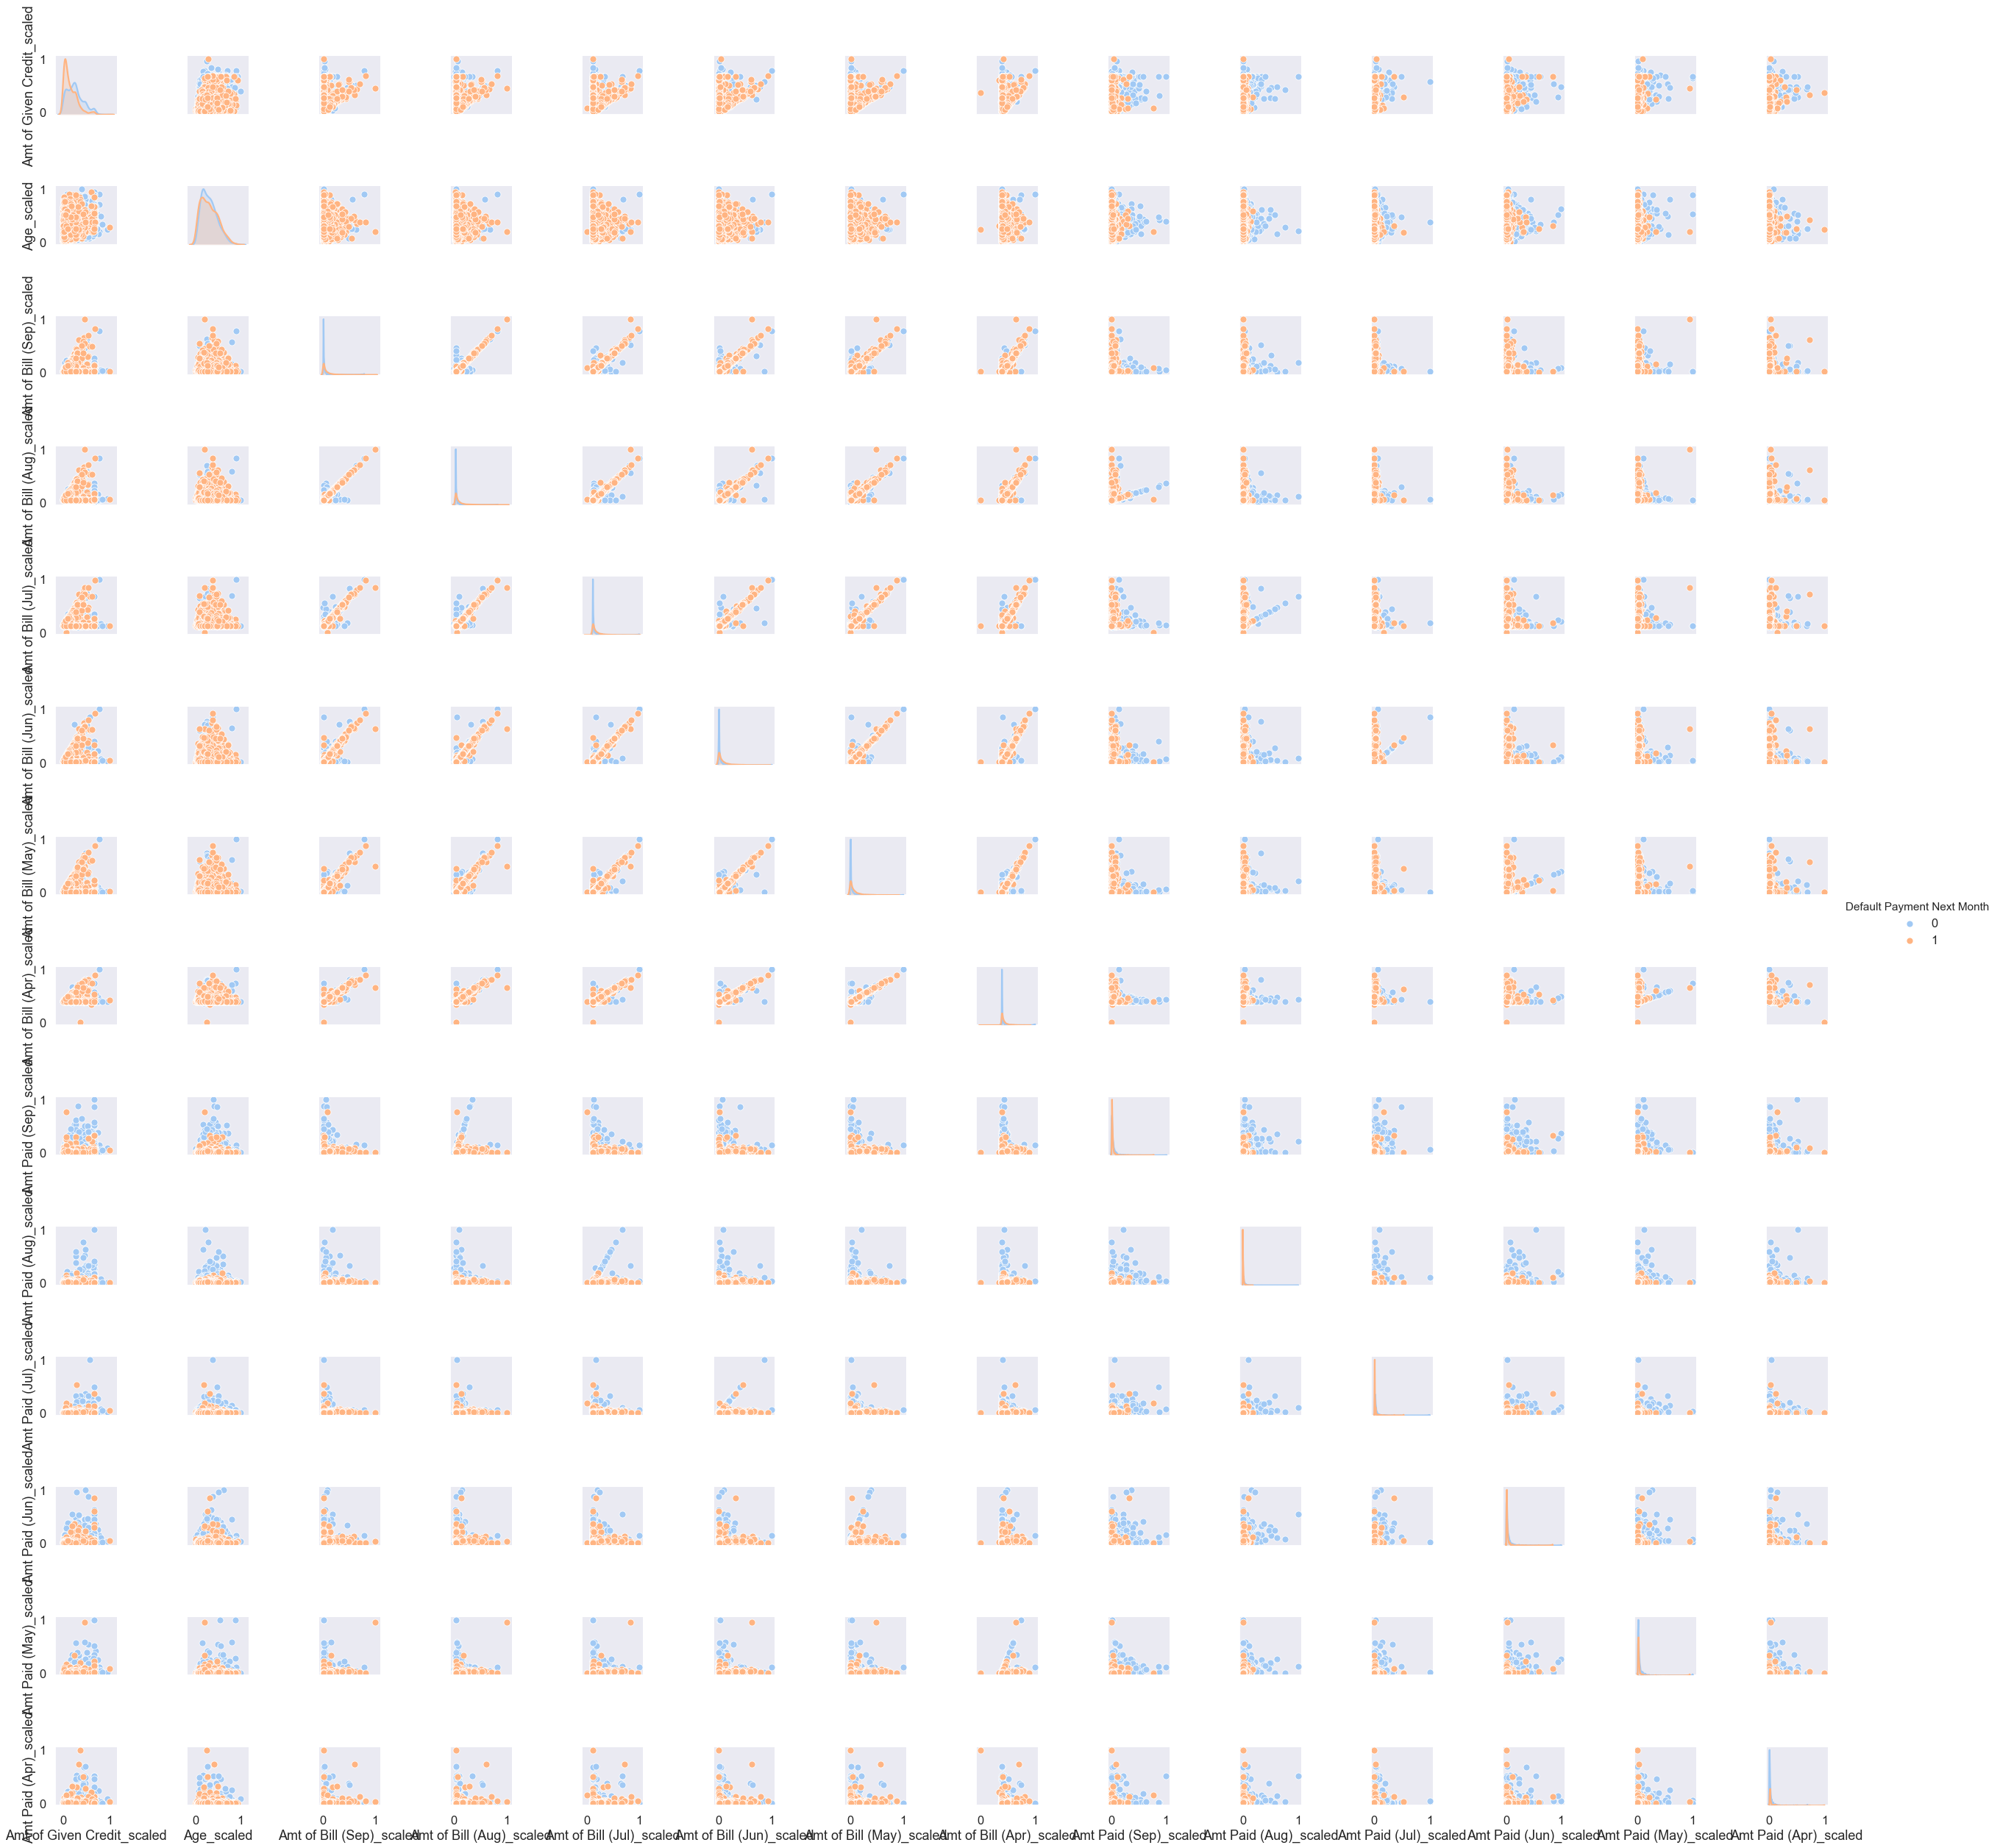

In [20]:
cont_vars = ['Amt of Given Credit_scaled', 'Age_scaled', 'Amt of Bill (Sep)_scaled',
       'Amt of Bill (Aug)_scaled', 'Amt of Bill (Jul)_scaled',
       'Amt of Bill (Jun)_scaled', 'Amt of Bill (May)_scaled',
       'Amt of Bill (Apr)_scaled', 'Amt Paid (Sep)_scaled',
       'Amt Paid (Aug)_scaled', 'Amt Paid (Jul)_scaled',
       'Amt Paid (Jun)_scaled', 'Amt Paid (May)_scaled',
       'Amt Paid (Apr)_scaled']

sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

sns.pairplot(norm_data, vars=cont_vars, hue='Default Payment Next Month')

> We find the most correlated features

In [37]:
# Calculates correlation values
feature_correlations = norm_data.corr()

# Simplifies by emptying all data below diagonal
tril_index = np.tril_indices_from(feature_correlations)

# Make unused values NaNs
correlations_array = np.array(feature_correlations)
correlations_array[tril_index] = np.nan

# Recreate correlation pandas dataframe
feature_correlations = pd.DataFrame(correlations_array, columns=feature_correlations.columns, index=feature_correlations.index)

# Stack the data and convert to a dataframe
feature_correlations = (feature_correlations
                       .stack()
                       .to_frame()
                       .reset_index()
                       .rename(columns={'level_0': 'Feature 1',
                                        'level_1': 'Feature 2',
                                       0: 'Correlation'}))

# Get absolute values
feature_correlations['Abs_Correlation'] = feature_correlations['Correlation'].abs()
feature_correlations.sort_values(by='Correlation')

,Feature 1,Feature 2,Correlation,Abs_Correlation
66,Marriage_scaled,Age_scaled,-0.467511,0.467511
8,Amt of Given Credit_scaled,Payment Status (Aug)_scaled,-0.430701,0.430701
5,Amt of Given Credit_scaled,Payment Status (May)_scaled,-0.426358,0.426358
9,Amt of Given Credit_scaled,Payment Status (Sep)_scaled,-0.423406,0.423406
6,Amt of Given Credit_scaled,Payment Status (Jun)_scaled,-0.422676,0.422676
...,...,...,...,...
231,Amt of Bill (Jun)_scaled,Amt of Bill (May)_scaled,0.949492,0.949492
199,Amt of Bill (Sep)_scaled,Amt of Bill (Jul)_scaled,0.949839,0.949839
222,Amt of Bill (Jul)_scaled,Amt of Bill (May)_scaled,0.950455,0.950455
198,Amt of Bill (Sep)_scaled,Amt of Bill (Aug)_scaled,0.955645,0.955645


In [39]:
feature_correlations.sort_values(by='Abs_Correlation')

,Feature 1,Feature 2,Correlation,Abs_Correlation
104,Age_scaled,Default Payment Next Month,0.002215,0.002215
42,Sex_scaled,Amt Paid (May)_scaled,0.003426,0.003426
24,Sex_scaled,Marriage_scaled,-0.003501,0.003501
38,Sex_scaled,Amt Paid (Sep)_scaled,0.004610,0.004610
73,Marriage_scaled,Amt of Bill (Sep)_scaled,-0.009126,0.009126
...,...,...,...,...
231,Amt of Bill (Jun)_scaled,Amt of Bill (May)_scaled,0.949492,0.949492
199,Amt of Bill (Sep)_scaled,Amt of Bill (Jul)_scaled,0.949839,0.949839
222,Amt of Bill (Jul)_scaled,Amt of Bill (May)_scaled,0.950455,0.950455
198,Amt of Bill (Sep)_scaled,Amt of Bill (Aug)_scaled,0.955645,0.955645


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Correlation')]

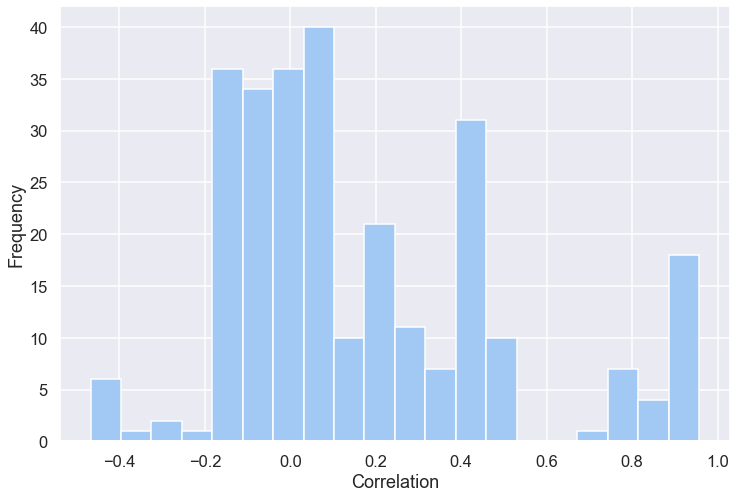

In [51]:
# look at distribution of correlations
sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

ax = feature_correlations['Correlation'].hist(bins=20, figsize=(12,8))
ax.set(xlabel='Correlation', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Absolute Correlation')]

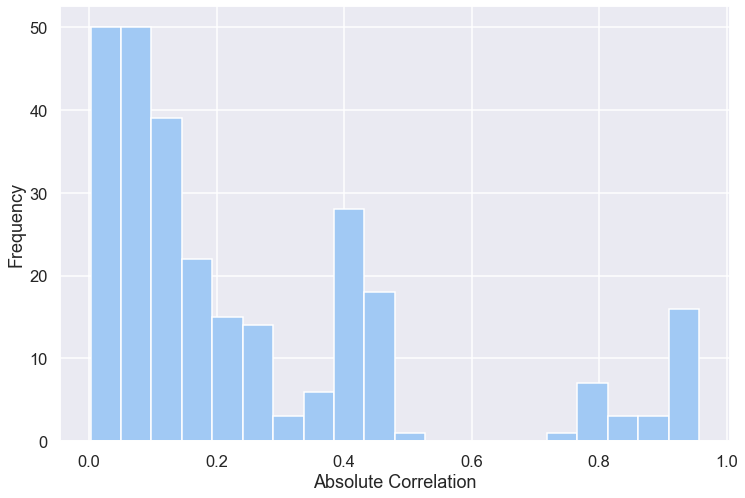

In [54]:
# look at distribution of absolute correlations
sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

ax = feature_correlations['Abs_Correlation'].hist(bins=20, figsize=(12,8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency')

> Many correlations appear to be small or mild, with some correlations being very strong.

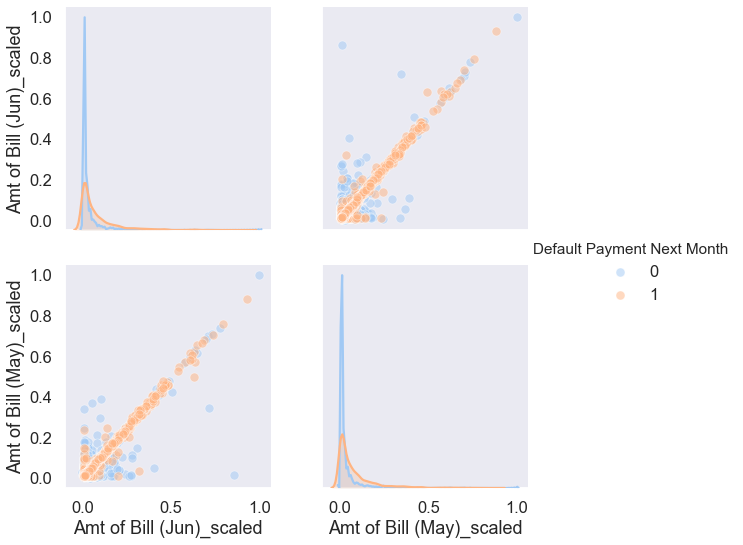

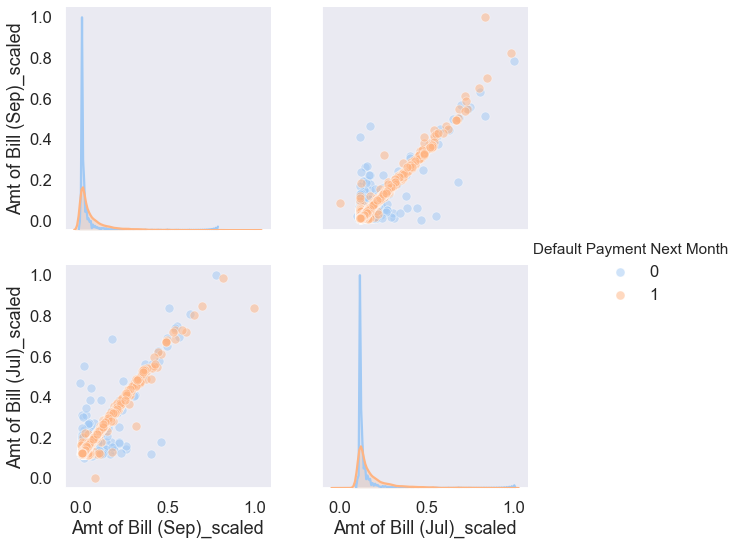

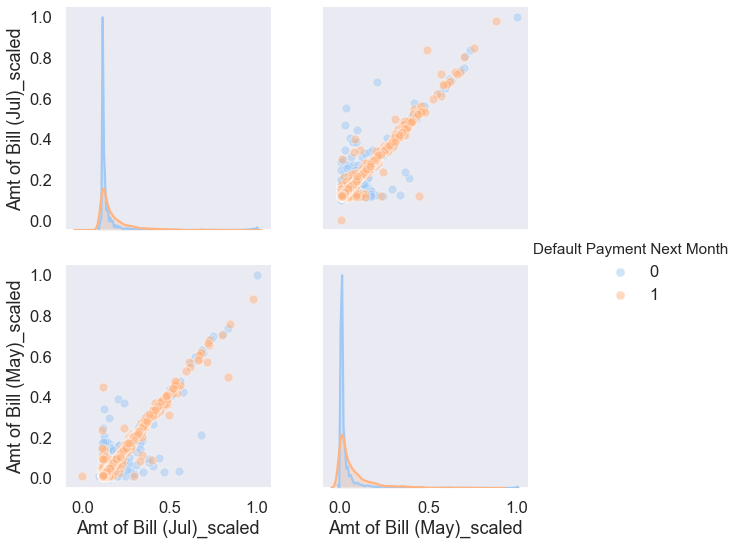

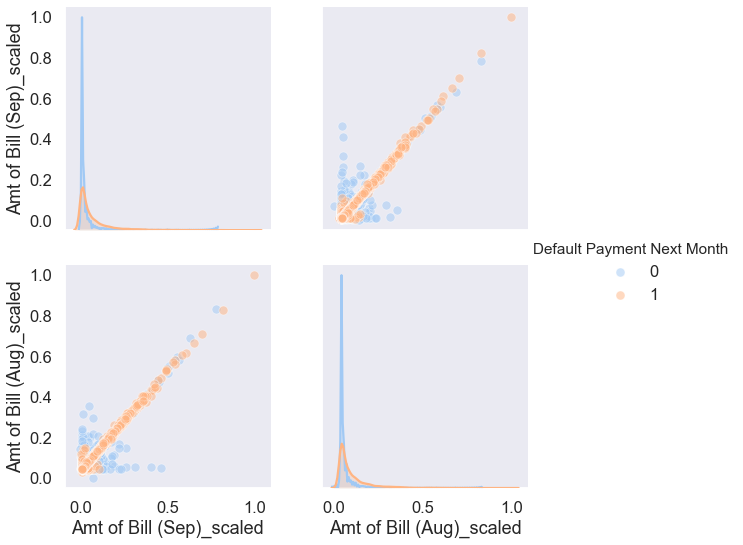

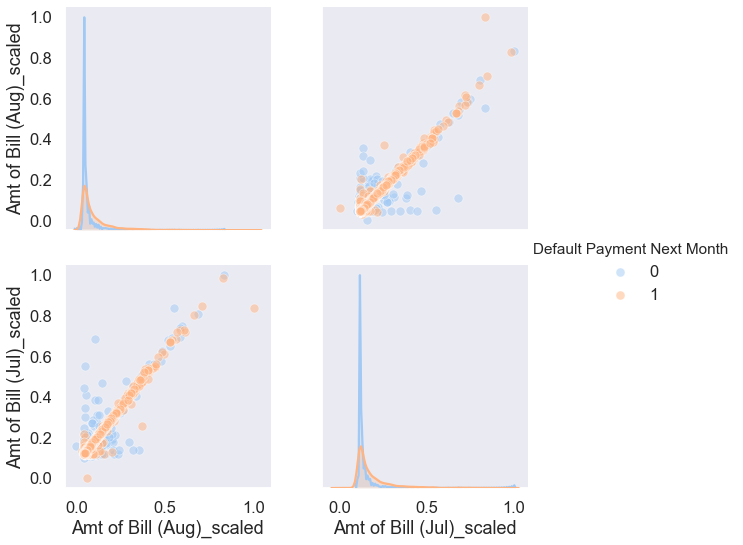

In [83]:
# Density and pairplots of 5 most positive correlated sets of features
sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

features = [('Amt of Bill (Jun)_scaled', 'Amt of Bill (May)_scaled'), 
            ('Amt of Bill (Sep)_scaled', 'Amt of Bill (Jul)_scaled'),
            ('Amt of Bill (Jul)_scaled', 'Amt of Bill (May)_scaled'), 
            ('Amt of Bill (Sep)_scaled', 'Amt of Bill (Aug)_scaled'),
            ('Amt of Bill (Aug)_scaled', 'Amt of Bill (Jul)_scaled')]

for i in features:
    sns.pairplot(norm_data, vars=i, hue='Default Payment Next Month', height=4, plot_kws={'alpha':0.5})


> Some signs of class separation is evident. We notice that there appears to be more instances of no default when the bill amounts are lower for nearby months, although default does occur when bill amounts are low. Bill amounts for nearby months when defaulting appear to be linearly related. Additionally, there are some instances when bill amounts are high for nearby months, but there is no default

> Examine correlations between features and the response

In [93]:
# Check correlations between features and response
y = norm_data['Default Payment Next Month']
fields = list(norm_data.columns[:-1])
correlations = norm_data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Amt of Given Credit_scaled    -0.284032
Amt Paid (Sep)_scaled         -0.149006
Amt Paid (Aug)_scaled         -0.143838
Amt Paid (Jun)_scaled         -0.130372
Amt Paid (Jul)_scaled         -0.123778
Amt Paid (May)_scaled         -0.115532
Amt Paid (Apr)_scaled         -0.077084
Sex_scaled                    -0.060158
Age_scaled                     0.002215
Marriage_scaled                0.020276
Education_scaled               0.101065
Amt of Bill (Sep)_scaled       0.229802
Amt of Bill (Apr)_scaled       0.232111
Amt of Bill (Jun)_scaled       0.233001
Amt of Bill (Jul)_scaled       0.233985
Amt of Bill (Aug)_scaled       0.235649
Amt of Bill (May)_scaled       0.242670
Payment Status (Jun)_scaled    0.463107
Payment Status (May)_scaled    0.470815
Payment Status (Jul)_scaled    0.472172
Payment Status (Apr)_scaled    0.473176
Payment Status (Sep)_scaled    0.475658
Payment Status (Aug)_scaled    0.480614
dtype: float64

In [102]:
df = pd.DataFrame({'Correlations with y': correlations})
df

,Correlations with y
Amt of Given Credit_scaled,-0.284032
Amt Paid (Sep)_scaled,-0.149006
Amt Paid (Aug)_scaled,-0.143838
Amt Paid (Jun)_scaled,-0.130372
Amt Paid (Jul)_scaled,-0.123778
Amt Paid (May)_scaled,-0.115532
Amt Paid (Apr)_scaled,-0.077084
Sex_scaled,-0.060158
Age_scaled,0.002215
Marriage_scaled,0.020276


> Look for outliers with boxplots. Boxplots would seem to reinforce empirically skewed distribution of some of the features determined earlier through histograms and density plots. For now we will perform model fitting including these observations. We plan to the re-fit models later with data which has accounted for outliers and compare.

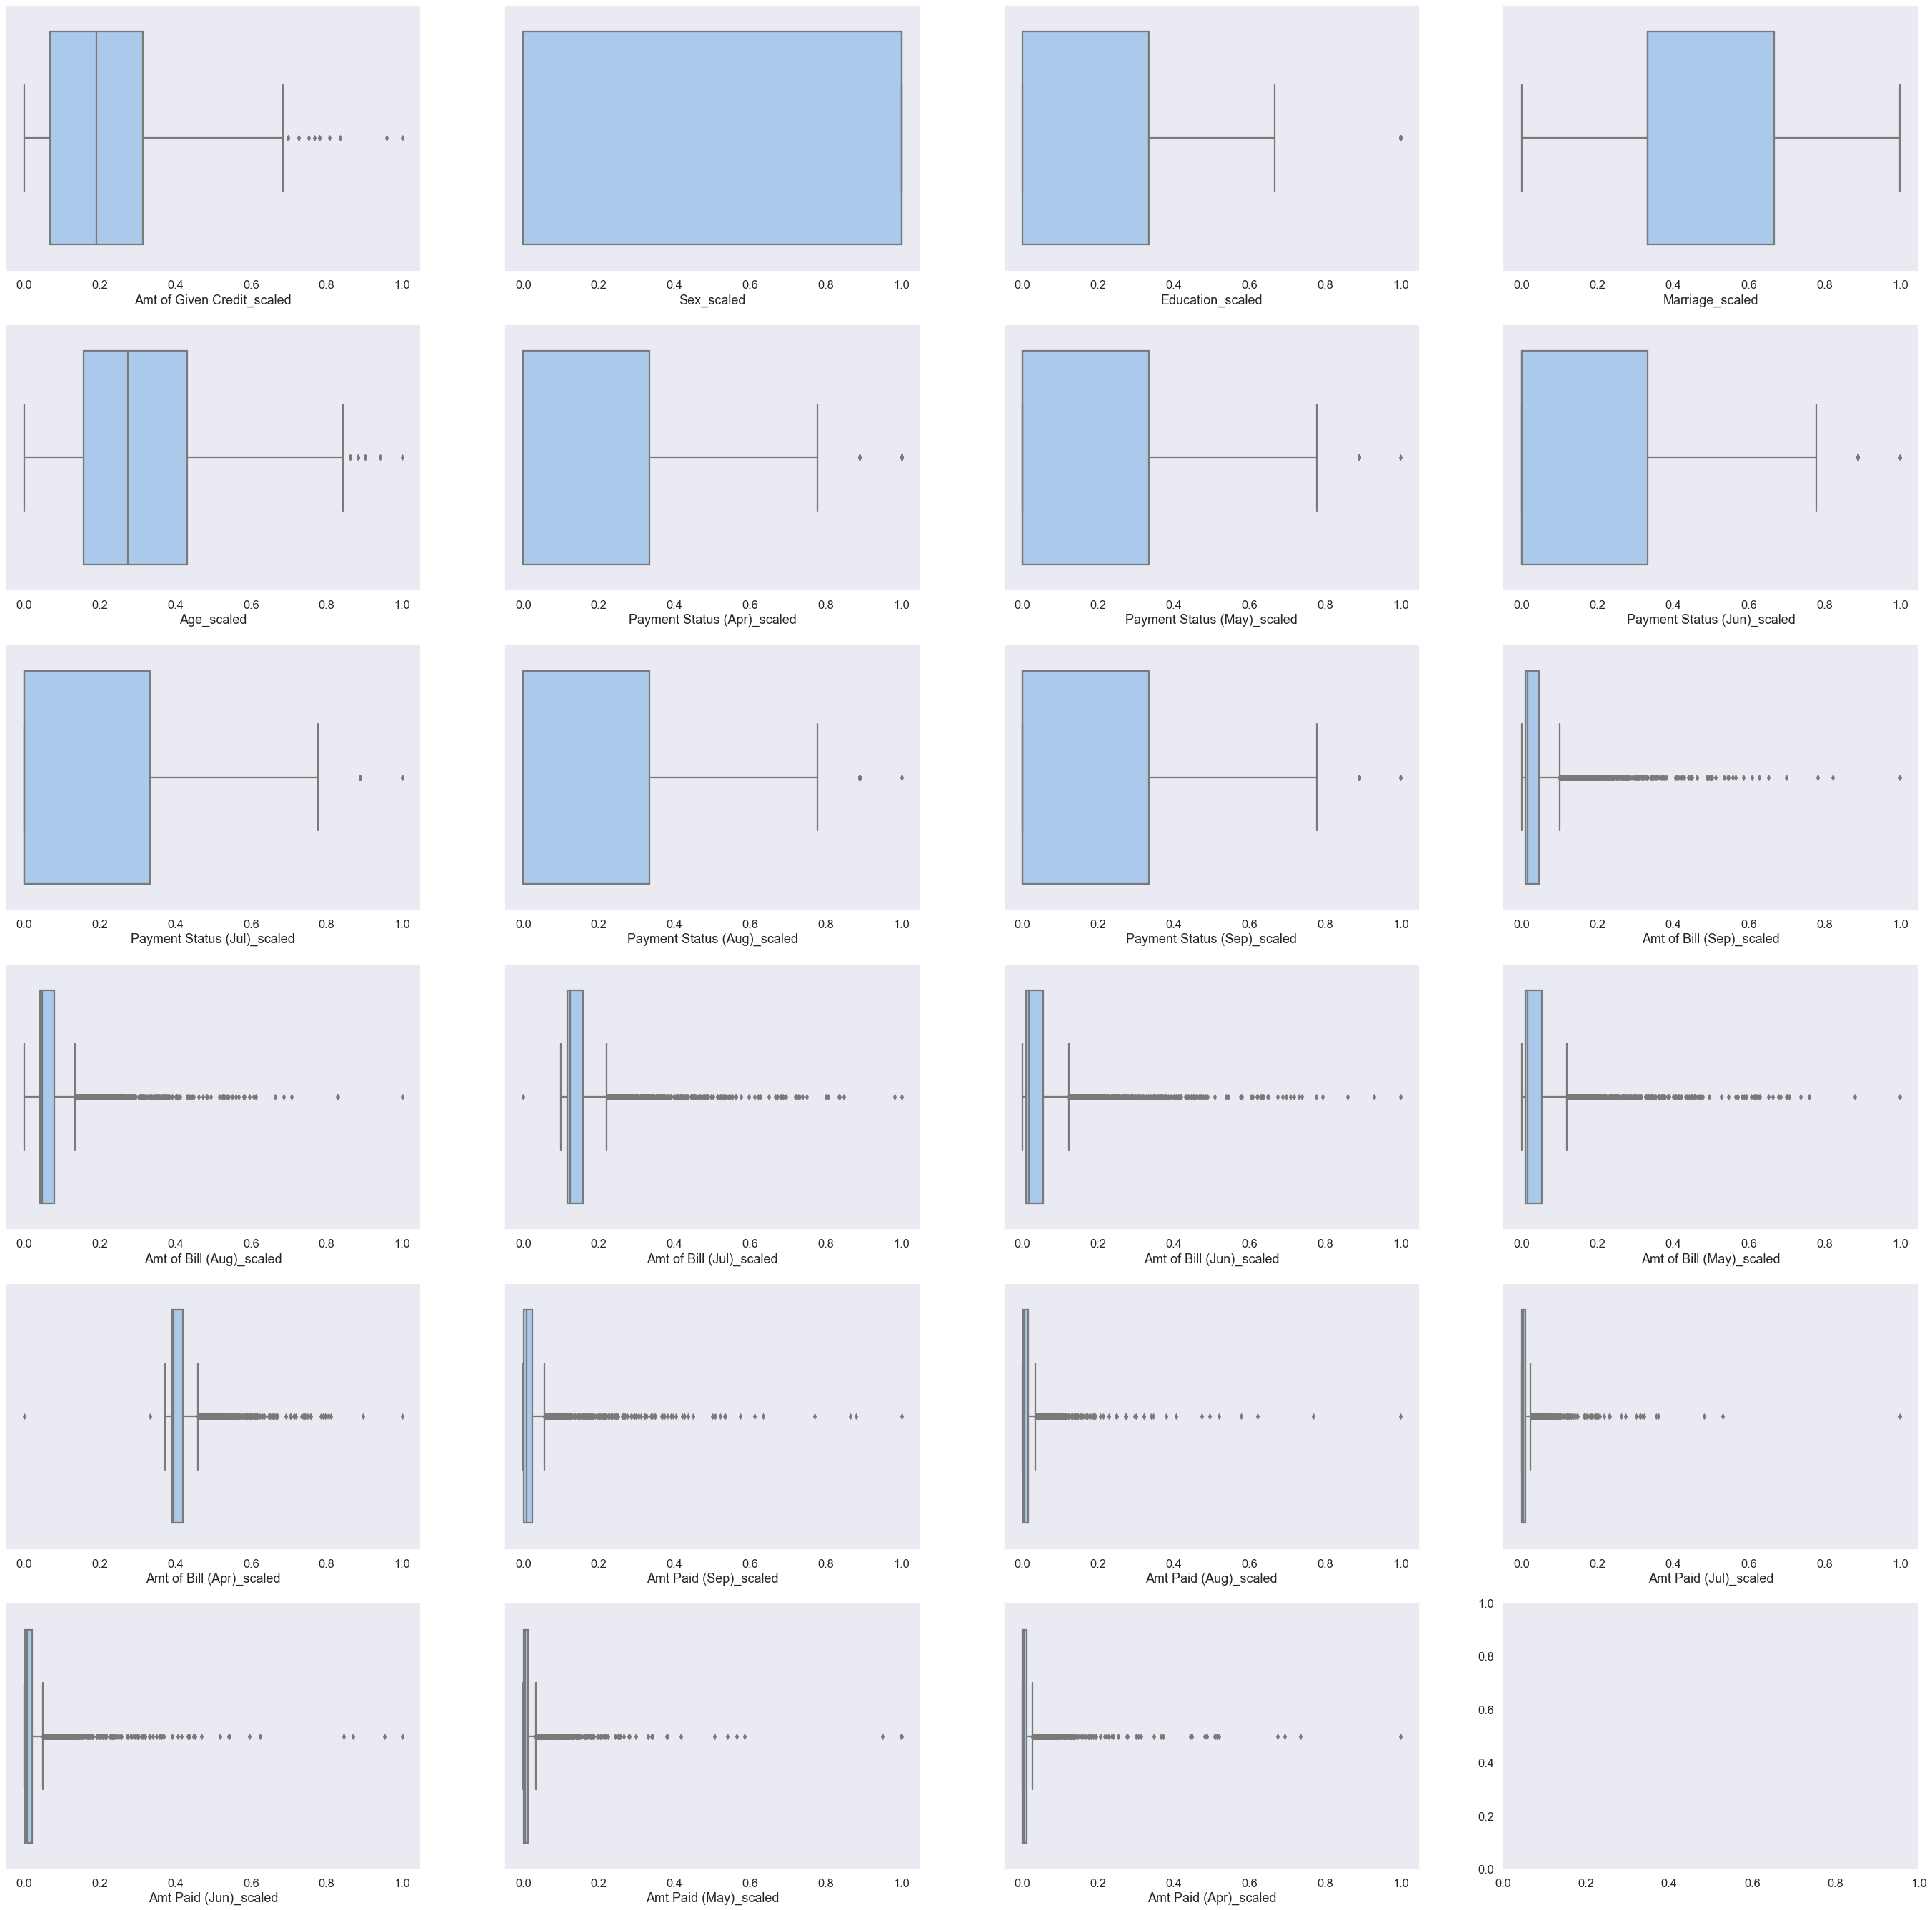

In [111]:
# Look for outliers
sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

fig, ax = plt.subplots(6,4)
fig.set_size_inches(48,48)
ax = ax.flatten()

fields = list(norm_data.columns[:-1])

for field, ax in zip(fields, ax):
    sns.boxplot(norm_data[field], ax=ax)

In [116]:
# Export dataset for model fitting
norm_data.to_csv(r'C:\\Users\\lasli\\Documents\\Independent Work\\Credit Default\\Default of Credit Card Clients Normalized.csv', index=False)

In [117]:
norm_data

,Amt of Given Credit_scaled,Sex_scaled,Education_scaled,Marriage_scaled,Age_scaled,Payment Status (Apr)_scaled,Payment Status (May)_scaled,Payment Status (Jun)_scaled,Payment Status (Jul)_scaled,Payment Status (Aug)_scaled,...,Amt of Bill (Jun)_scaled,Amt of Bill (May)_scaled,Amt of Bill (Apr)_scaled,Amt Paid (Sep)_scaled,Amt Paid (Aug)_scaled,Amt Paid (Jul)_scaled,Amt Paid (Jun)_scaled,Amt Paid (May)_scaled,Amt Paid (Apr)_scaled,Default Payment Next Month
0,0.342466,1.0,0.000000,0.666667,0.588235,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025312,0.051523,0.407316,0.116545,0.032895,0.020554,0.115125,0.000000,0.010542,0
1,0.150685,1.0,0.333333,0.333333,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007954,0.008878,0.391921,0.001688,0.001043,0.000000,0.003263,0.001041,0.000000,1
2,0.054795,1.0,0.666667,0.333333,0.509804,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012112,0.067559,0.391853,0.018242,0.011292,0.004895,0.157089,0.000847,0.000000,0
3,0.301370,1.0,0.000000,0.666667,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039215,0.035808,0.434129,0.092251,0.043837,0.036732,0.073857,0.122868,0.000000,0
4,0.506849,0.0,0.333333,0.666667,0.215686,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.073207,0.030968,0.405247,0.115060,0.049967,0.059094,0.061178,0.039125,0.023896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.479452,0.0,0.333333,0.333333,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009658,0.009575,0.392694,0.004466,0.002759,0.002002,0.005090,0.003249,0.001770,0
4036,0.164384,0.0,0.666667,0.333333,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013571,0.010754,0.392958,0.009754,0.009344,0.006600,0.008182,0.004003,0.006956,1
4037,0.041096,0.0,0.333333,0.666667,0.509804,0.333333,0.333333,0.444444,0.333333,0.333333,...,0.112420,0.100488,0.445671,0.021367,0.000000,0.004789,0.000000,0.011598,0.000000,1
4038,0.273973,0.0,0.333333,0.333333,0.254902,0.444444,0.333333,0.333333,0.333333,0.333333,...,0.013049,0.012556,0.394440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
